# **SPOTIPY ANALYSIS**

| Name           | Roll No. | Course                     | Semester |
| -------------- | -------- | -------------------------- | -------- |
| Pratham Sharma | AC-1232  | B.Sc. (H) Computer Science | 5        |
| Raj Khatri     | AC-1235  | B.Sc. (H) Computer Science | 5        |

### **Subject** : Data Analysis and Visualization

### **Submitted To** : Dr. Sharanjit Kaur

### **Date of Submission** : 10th November 2022


Objective

1. To analyse the listening habits of people over the past decade
2. Analysing songs from different generations on the factors such as :
   - danceability
   - energy
   - key
   - loudness
   - mode
   - speechiness
   - acousticness
   - instrumentalness
   - liveness
   - valence
3. Growth of particular artists over the year
4. Analysing growth of departed artists like KK, Siddhu Moosewala, etc. before and after their death.
5. Comparative Analysis of songs and their remake versions.

Steps

1. Creating a Spotify Account
2. Registering the Spotify Developer Program
3. Creating spotify credentials for the project
4. Installing spotipy package
5. Initilaizing spotipy in Jupiter notebook.
6. Using previously created credetials for api calling
7. Storing the data in a pandas database
8. Analysing data and Plotting graphs using pandas, numpy and Matplotlib


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


In [3]:
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
from spotipy.oauth2 import SpotifyOAuth

cid = '5d9494efb79d4abaabc13e9778431f49'
secret = '4d23d535c7fe4e9cadd241ddf58df15e'
scope = "user-read-currently-playing"

client_credentials_manager = SpotifyClientCredentials(
    client_id=cid, client_secret=secret)

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(
    client_id=cid, client_secret=secret, redirect_uri="http://localhost:9000"))

# sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager, scope=scope)
sp.user('pratham')


{'display_name': 'pratham',
 'external_urls': {'spotify': 'https://open.spotify.com/user/pratham'},
 'followers': {'href': None, 'total': 0},
 'href': 'https://api.spotify.com/v1/users/pratham',
 'id': 'pratham',
 'images': [],
 'type': 'user',
 'uri': 'spotify:user:pratham'}

In [4]:
FeatureDF = pd.read_csv('./data/features/features.csv')
TracksDF = pd.read_csv('./data/tracks/tracks.csv')


In [5]:
TracksDF.head()


,playlist_uri,album,album_uri,artist,artist_uri,disc_number,duration_ms,name,popularity,explicit,uri,link
0,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,The Way That Lovers Do,spotify:album:4WLh56ZjwINYBNhaxLvEhA,Prateek Kuhad,spotify:artist:0tC995Rfn9k2l7nqgCZsV7,1,153693,All I Need,55,False,spotify:track:47hXMyQDGW8sA1NGqmFL7h,https://api.spotify.com/v1/tracks/47hXMyQDGW8s...
1,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,The Way That Lovers Do,spotify:album:4WLh56ZjwINYBNhaxLvEhA,Prateek Kuhad,spotify:artist:0tC995Rfn9k2l7nqgCZsV7,1,204373,Hollow,40,False,spotify:track:1y7FoHfVtbZV6mONGJgU7j,https://api.spotify.com/v1/tracks/1y7FoHfVtbZV...
2,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,The Way That Lovers Do,spotify:album:4WLh56ZjwINYBNhaxLvEhA,Prateek Kuhad,spotify:artist:0tC995Rfn9k2l7nqgCZsV7,1,193733,Favorite Peeps,44,False,spotify:track:0SHa9XHwYYB1UUmgbgHuhQ,https://api.spotify.com/v1/tracks/0SHa9XHwYYB1...
3,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,The Way That Lovers Do,spotify:album:4WLh56ZjwINYBNhaxLvEhA,Prateek Kuhad,spotify:artist:0tC995Rfn9k2l7nqgCZsV7,1,163653,Co2,53,False,spotify:track:3hB9lDLyAClYVZivMMl20N,https://api.spotify.com/v1/tracks/3hB9lDLyAClY...
4,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,The Way That Lovers Do,spotify:album:4WLh56ZjwINYBNhaxLvEhA,Prateek Kuhad,spotify:artist:0tC995Rfn9k2l7nqgCZsV7,1,184413,Face,39,False,spotify:track:0HuS5vFQd06cXV54I0twkV,https://api.spotify.com/v1/tracks/0HuS5vFQd06c...


In [6]:
FeatureDF.head()


,playlist_uri,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,uri
0,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,153693,6,1,4,0.771,0.786,0.356,0.6940,0.100,-11.432,0.0462,0.5190,116.023,spotify:track:47hXMyQDGW8sA1NGqmFL7h
1,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,204373,11,1,4,0.845,0.348,0.310,0.0569,0.111,-13.122,0.0413,0.0474,114.812,spotify:track:1y7FoHfVtbZV6mONGJgU7j
2,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,193733,7,1,4,0.767,0.611,0.525,0.7990,0.112,-9.683,0.0354,0.2990,113.946,spotify:track:0SHa9XHwYYB1UUmgbgHuhQ
3,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,163653,1,1,4,0.663,0.533,0.678,0.0000,0.145,-5.244,0.0256,0.6830,80.960,spotify:track:3hB9lDLyAClYVZivMMl20N
4,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,184413,7,1,4,0.920,0.481,0.669,0.0219,0.139,-13.329,0.4550,0.3510,128.219,spotify:track:0HuS5vFQd06cXV54I0twkV


Since Danceability, Energy, Speech, Acousticness, Instrumentalness, Liveness, Valence share the same scale, they would be usually grouped together and compared in data visualisations.

In [7]:
categories = ['danceability',
              'energy',
              'speechiness',
              'acousticness',
              'liveness',
              'valence']


# KEY
The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

Plotting the Key data from the tracks feature Dataframe shows us that the most used keys i.e. E & F

<AxesSubplot: xlabel='key', ylabel='Count'>

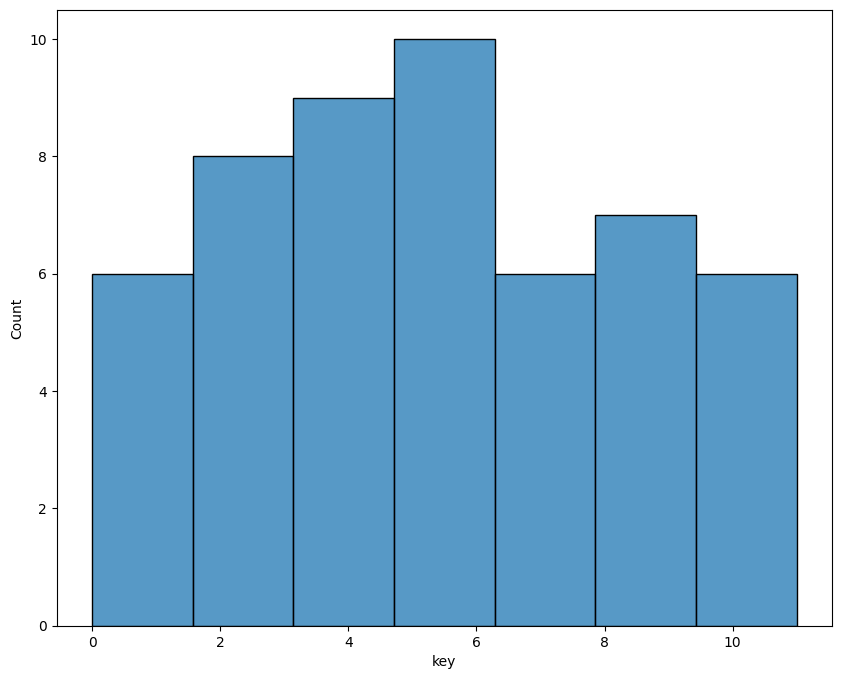

In [10]:
plt.figure(figsize=[10,8])
sns.histplot(FeatureDF,x='key')

# MAJOR and MINOR

0: Minor
1: Major

Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

Pie Chart below shows that the majority of songs have Major Modality

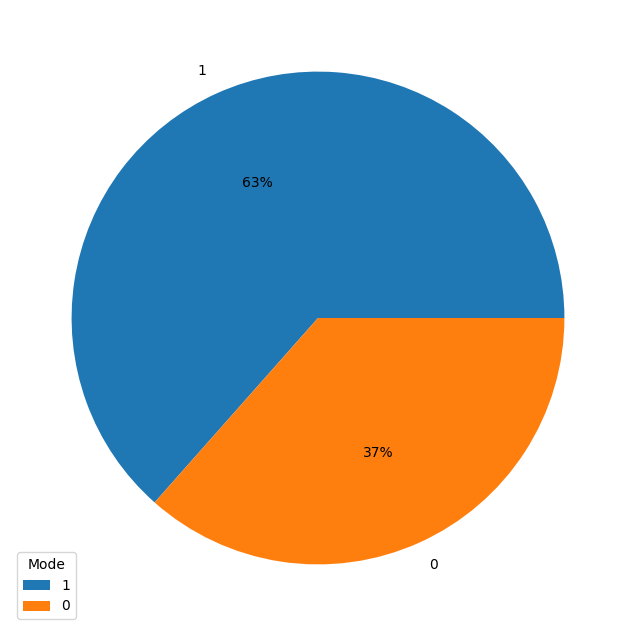

<Figure size 640x480 with 0 Axes>

In [12]:
plt.figure(figsize=[10,8])

mode = list(FeatureDF['mode'].value_counts().index)
size = list(FeatureDF['mode'].value_counts())

plt.pie(size,labels=mode,autopct='%1.0F%%')
plt.legend(mode,title='Mode',loc='best')
plt.figure(facecolor='white')
plt.show()

The plot below shows the distribution of scores for all tracks in the given playlist. Most songs are typically high-energy but the songs usually fall within the mid-level for danceability.

- Most of the songs have high energy, Dancebility and surprisingly acousticness.
- Acoustic songs generally not associated with these two factors.
- This result can be attributed to new age indie songs and their emphasis on beats over vocals

[Text(0.5, 1.0, 'Valence')]

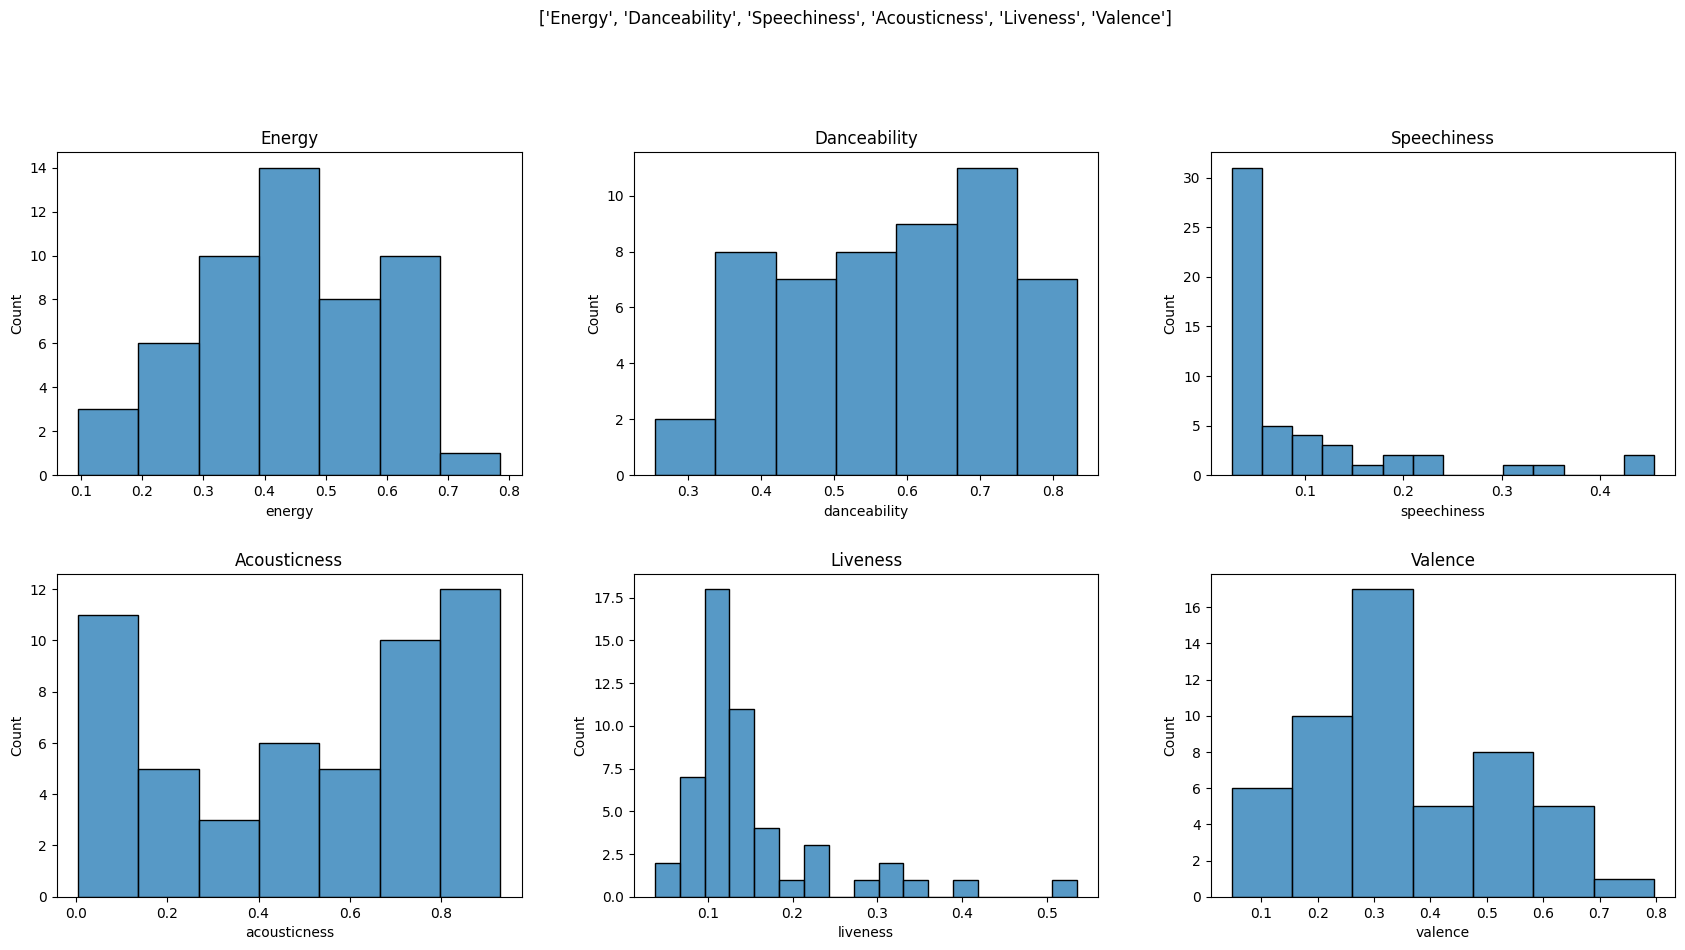

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle(['Energy', 'Danceability', 'Speechiness','Acousticness', 'Liveness', 'Valence'])

fig.tight_layout(pad=5.0)

sns.histplot(ax=axes[0, 0], data=FeatureDF, x='energy').set(title='Energy')
sns.histplot(ax=axes[0, 1], data=FeatureDF, x='danceability').set(title="Danceability")
sns.histplot(ax=axes[0, 2], data=FeatureDF, x='speechiness').set(title='Speechiness')
sns.histplot(ax=axes[1, 0], data=FeatureDF, x='acousticness').set(title='Acousticness')
sns.histplot(ax=axes[1, 1], data=FeatureDF, x='liveness').set(title='Liveness')
sns.histplot(ax=axes[1, 2], data=FeatureDF, x='valence').set(title='Valence')

## Data Filtering
The data taken from the Spotify API stores the same track in multiple rows for multiple artists. So, for a song with 3 artists there will be 3 entries.
To reduce this redundancy we first combine the tracks data on the basis of the song name and album name

In [23]:
# Fetched data
TracksDF

,playlist_uri,album,album_uri,artist,artist_uri,disc_number,duration_ms,name,popularity,explicit,uri,link
0,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,The Way That Lovers Do,spotify:album:4WLh56ZjwINYBNhaxLvEhA,Prateek Kuhad,spotify:artist:0tC995Rfn9k2l7nqgCZsV7,1,153693,All I Need,55,False,spotify:track:47hXMyQDGW8sA1NGqmFL7h,https://api.spotify.com/v1/tracks/47hXMyQDGW8s...
1,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,The Way That Lovers Do,spotify:album:4WLh56ZjwINYBNhaxLvEhA,Prateek Kuhad,spotify:artist:0tC995Rfn9k2l7nqgCZsV7,1,204373,Hollow,40,False,spotify:track:1y7FoHfVtbZV6mONGJgU7j,https://api.spotify.com/v1/tracks/1y7FoHfVtbZV...
2,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,The Way That Lovers Do,spotify:album:4WLh56ZjwINYBNhaxLvEhA,Prateek Kuhad,spotify:artist:0tC995Rfn9k2l7nqgCZsV7,1,193733,Favorite Peeps,44,False,spotify:track:0SHa9XHwYYB1UUmgbgHuhQ,https://api.spotify.com/v1/tracks/0SHa9XHwYYB1...
3,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,The Way That Lovers Do,spotify:album:4WLh56ZjwINYBNhaxLvEhA,Prateek Kuhad,spotify:artist:0tC995Rfn9k2l7nqgCZsV7,1,163653,Co2,53,False,spotify:track:3hB9lDLyAClYVZivMMl20N,https://api.spotify.com/v1/tracks/3hB9lDLyAClY...
4,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,The Way That Lovers Do,spotify:album:4WLh56ZjwINYBNhaxLvEhA,Prateek Kuhad,spotify:artist:0tC995Rfn9k2l7nqgCZsV7,1,184413,Face,39,False,spotify:track:0HuS5vFQd06cXV54I0twkV,https://api.spotify.com/v1/tracks/0HuS5vFQd06c...
...,...,...,...,...,...,...,...,...,...,...,...,...
59,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,Baaraat,spotify:album:5tJNl2p7wNTuRBvikWFHSn,Nucleya,spotify:artist:2CkrXQPoBz8jTQ3u0ZeLPh,1,167471,Ari Ari,52,False,spotify:track:3edqjLVQrRPLvt9FAYUAsT,https://api.spotify.com/v1/tracks/3edqjLVQrRPL...
60,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,Baaraat,spotify:album:5tJNl2p7wNTuRBvikWFHSn,Ritviz,spotify:artist:72beYOeW2sb2yfcS4JsRvb,1,219240,Roz,58,False,spotify:track:1rDQJd8kzwBRXeoTtojkQn,https://api.spotify.com/v1/tracks/1rDQJd8kzwBR...
61,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,Baaraat,spotify:album:5tJNl2p7wNTuRBvikWFHSn,Nucleya,spotify:artist:2CkrXQPoBz8jTQ3u0ZeLPh,1,219240,Roz,58,False,spotify:track:1rDQJd8kzwBRXeoTtojkQn,https://api.spotify.com/v1/tracks/1rDQJd8kzwBR...
62,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,Baaraat,spotify:album:5tJNl2p7wNTuRBvikWFHSn,Ritviz,spotify:artist:72beYOeW2sb2yfcS4JsRvb,1,222096,Baaraat,64,False,spotify:track:0YLSjVxSb5FT1Bo8Tnxr8j,https://api.spotify.com/v1/tracks/0YLSjVxSb5FT...


In [24]:
# Grouped Data
tracksDF2 = TracksDF.groupby(['name', 'album', 'uri'])[
    'artist'].apply(','.join).reset_index()
tracksDF2


,name,album,uri,artist
0,0 to 100,No Name,spotify:track:7cVe3mYMIfhOlz1NXFWv70,Sidhu Moose Wala
1,051021,Scars & Screws,spotify:track:6D0RJju2TSMtZM1jsRc58S,"Shamoon Ismail,Talha Anjum"
2,All I Need,The Way That Lovers Do,spotify:track:47hXMyQDGW8sA1NGqmFL7h,Prateek Kuhad
3,All Night Long,Scars & Screws,spotify:track:308ngBPHBQa8HW4n0PBUKh,Shamoon Ismail
4,Ari Ari,Baaraat,spotify:track:3edqjLVQrRPLvt9FAYUAsT,"Ritviz,Nucleya"
5,Baaraat,Baaraat,spotify:track:0YLSjVxSb5FT1Bo8Tnxr8j,"Ritviz,Nucleya"
6,Bloodlust (feat. Mr. Capone-E),No Name,spotify:track:1O00WM9qGLUBA5gq2yw0WF,"Sidhu Moose Wala,Mr. Capone-E"
7,Bloom,The Way That Lovers Do,spotify:track:39lOHITmszIVH9WF4Jpbum,Prateek Kuhad
8,Chaunde Ne Pharna,Scars & Screws,spotify:track:18sA3ZuFnaYvinSyc1EZ0M,Shamoon Ismail
9,Co2,The Way That Lovers Do,spotify:track:3hB9lDLyAClYVZivMMl20N,Prateek Kuhad


Now we combine the 2 Dataframes fetched from the Playlist to create a DataFrame containing a Song's name, album name, Artists and its several features

In [17]:
DF1 = pd.merge(tracksDF2, FeatureDF, on="uri")
DF1.head()

,name,album,uri,artist,playlist_uri,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,0 to 100,No Name,spotify:track:7cVe3mYMIfhOlz1NXFWv70,Sidhu Moose Wala,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,108493,8,1,4,0.1390,0.742,0.675,0.000000,0.1670,-6.551,0.0907,0.679,145.989
1,051021,Scars & Screws,spotify:track:6D0RJju2TSMtZM1jsRc58S,"Shamoon Ismail,Talha Anjum",spotify:playlist:7gKVccRxsOD0gKdUv63HoB,211544,2,1,4,0.0641,0.679,0.661,0.003270,0.0976,-8.928,0.1240,0.388,169.979
2,All I Need,The Way That Lovers Do,spotify:track:47hXMyQDGW8sA1NGqmFL7h,Prateek Kuhad,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,153693,6,1,4,0.7710,0.786,0.356,0.694000,0.1000,-11.432,0.0462,0.519,116.023
3,All Night Long,Scars & Screws,spotify:track:308ngBPHBQa8HW4n0PBUKh,Shamoon Ismail,spotify:playlist:7gKVccRxsOD0gKdUv63HoB,190358,7,1,4,0.0554,0.756,0.436,0.031100,0.3090,-7.262,0.0457,0.228,101.933
4,Ari Ari,Baaraat,spotify:track:3edqjLVQrRPLvt9FAYUAsT,"Ritviz,Nucleya",spotify:playlist:7gKVccRxsOD0gKdUv63HoB,167472,0,1,4,0.0052,0.721,0.676,0.000003,0.2050,-6.534,0.0450,0.394,140.080


The summaryDF groups the data on the basis of album name and takes the average of the features of all the songs in that album

In [18]:
summaryDF = DF1.groupby("album").mean().reset_index()
summaryDF


C:\Users\prrra\AppData\Local\Temp\ipykernel_17252\3398390596.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,album,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,Baaraat,206257.000000,3.750000,0.500000,4.000000,0.169650,0.704250,0.597250,6.450000e-07,0.219900,-7.001750,0.069000,0.528500,126.792000
1,No Name,171279.200000,7.400000,0.600000,4.200000,0.156220,0.734000,0.654000,0.000000e+00,0.130060,-7.104400,0.180800,0.589400,131.594600
2,Scars & Screws,191376.916667,4.833333,0.583333,4.000000,0.166125,0.660167,0.434833,2.684601e-02,0.155367,-10.763917,0.151433,0.311500,115.787083
3,The Civil Wars,215217.750000,4.833333,0.666667,3.833333,0.740250,0.412083,0.319567,1.440484e-03,0.118400,-9.798500,0.033950,0.290917,131.534417
4,The Way That Lovers Do,179061.636364,5.272727,0.909091,4.000000,0.772091,0.543455,0.458818,1.653695e-01,0.120173,-10.351545,0.074764,0.341218,109.082909
5,rapunzel,197277.125000,5.875000,0.375000,4.000000,0.656625,0.595875,0.441250,4.528588e-03,0.210000,-10.232625,0.071925,0.321750,101.885875


The Plot below shows a pictorial linechart representation of each album can be viewed below

In [19]:
album = summaryDF['album']
fig = go.Figure()
fig.add_trace(go.Scatter(x=album, y=DF1['danceability'],
                         mode='lines+markers', name='Avg. Danceability',))
fig.add_trace(go.Scatter(x=album, y=DF1['energy'],
                         mode='lines+markers', name='Avg. Energy'))
fig.add_trace(go.Scatter(x=album, y=DF1['liveness'],
                         mode='lines+markers', name='Avg. Liveness'))
fig.add_trace(go.Scatter(x=album, y=DF1['valence'],
                         mode='lines+markers', name='Avg. Valence'))
fig.add_trace(go.Scatter(x=album, y=DF1['acousticness'],
                         mode='lines+markers', name='Avg. Acousticness'))
fig.add_trace(go.Scatter(x=album, y=DF1['speechiness'],
                         mode='lines+markers', name='Avg. Speechiness'))


In [20]:
summaryDF['album']

0                   Baaraat
1                   No Name
2            Scars & Screws
3            The Civil Wars
4    The Way That Lovers Do
5                  rapunzel
Name: album, dtype: object

In [22]:
fig = go.Figure()
album_names = summaryDF['album']
for a in album_names:
    temp = DF1[DF1["album"] == a]
    for index, row in temp.iterrows():
        fig.add_trace(go.Scatterpolar(
            r=row[categories],
            theta=categories,
            fill='toself',
            name=row["name"]
        ))
    fig.update_layout(title="Album: " + a)
    fig.show()
    fig = go.Figure()
